# Business Understanding

Every year a high number of people lose their lives or suffer disabilities as a result of a road traffic accidents. Additionally, road traffic accidents cause considerable economic losses to individuals, their families, and the government.
As a result, this topic deserves serious attention. 

The aim of this project is, therefore, to use supervised learning on past traffic accident data to predict the severity of car accidents as a result of the complex interplay of parameters such as weather, road condition, speeding etc. and identify factors that increase the risk of severe accidents.

# Data Understanding

The data is obtained from https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
file = 'Data-Collisions.csv'
df = pd.read_csv(file, low_memory=False)

In [3]:
print('Dataframe has', df.shape[1], 'columns and', df.shape[0], 'entries.')
df.head(1)

Dataframe has 38 columns and 194673 entries.


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.70314,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


There are integer, float and string entries.

In [4]:
df.dtypes.to_frame().head(7)

,0
SEVERITYCODE,int64
X,float64
Y,float64
OBJECTID,int64
INCKEY,int64
COLDETKEY,int64
REPORTNO,object


70% of accidents belong to category "Property Damage Only Collision" while 30% belong to category "Injury Collision"

In [5]:
df['SEVERITYDESC'].value_counts().to_frame()/df.shape[0]

,SEVERITYDESC
Property Damage Only Collision,0.701099
Injury Collision,0.298901


Number of accidents seems to be nearly constant since 2009. The number of accidents in 2020 is quite low even if we consider that the data dates only up to may 2020. This is probably a result of the decreased traffic due to COVID-19.

In [6]:
# Convert 'INCDTTM' to date type
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
# Extract month, weekday, hour information
df['MONTH']=df['INCDTTM'].dt.month
df['WEEKDAY']=df['INCDTTM'].dt.weekday
df['HOUR']=df['INCDTTM'].dt.hour
df['YEAR']=df['INCDTTM'].dt.year
# Drop
df.drop(['INCDATE', 'INCDTTM'], axis=1, inplace=True)

Text(0.5, 1.0, 'Collisions (2004 to 2020)')

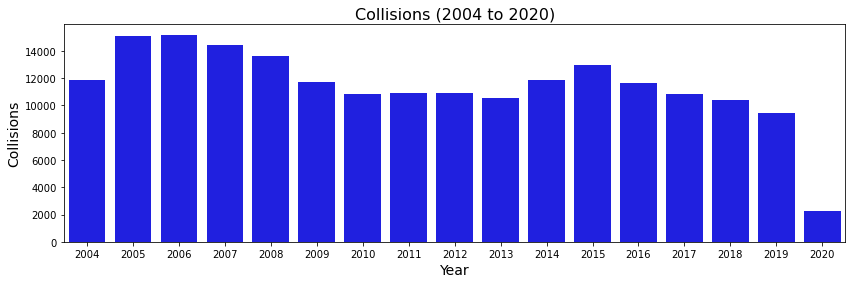

In [7]:
fig, ax = plt.subplots(figsize=(14,4))
sns.countplot(df['YEAR'], color='b', ax=ax)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Collisions', fontsize=14)
plt.title('Collisions (2004 to 2020)', fontsize=16)

There are more incidents under influence during winter season.

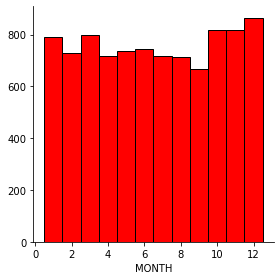

In [8]:
df['UNDERINFL'] = df['UNDERINFL'].replace('Y', 1).replace('1', 1).replace('0', 0).replace('N', 0)

bins = np.linspace(df['MONTH'].min()-0.5, df['MONTH'].max()+0.5, 13)
g = sns.FacetGrid(df[df['UNDERINFL']==1], hue='UNDERINFL', height=4)
g.map(plt.hist, 'MONTH', bins=bins, color='r', ec="k")

There is less incidents on sundays. Probably due to less traffic as people do not drive to work and stay at home.

Text(0.5, 1.0, 'Collisions - Day fo the week')

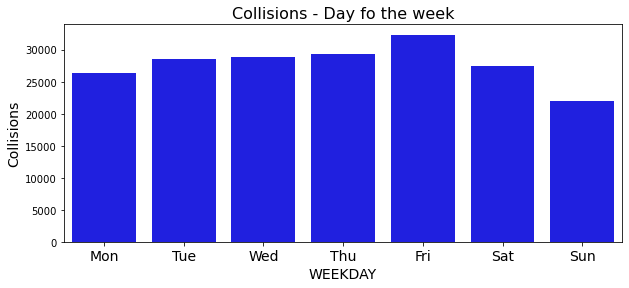

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(df['WEEKDAY'], color='b', ax=ax)
ax.set_xlabel('WEEKDAY', fontsize=14)
ax.set_ylabel('Collisions', fontsize=14)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=14)
plt.title('Collisions - Day fo the week', fontsize=16)

The injury rate of incidents taking place in intersections is significantly higher than in blocks or alleys. Collisions in alleys are very rare.

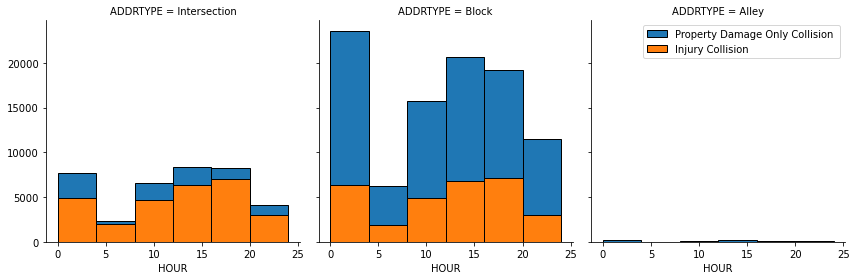

In [33]:
bins = [0, 4, 8, 12, 16, 20, 24]
g = sns.FacetGrid(df, hue='SEVERITYCODE',col='ADDRTYPE', height=4)
g.map(plt.hist, 'HOUR', bins=bins, ec="k")
plt.legend(['Property Damage Only Collision ', 'Injury Collision'])

A higher percentage of collisions happening in the morning and early morning are due to inattention of drivers.

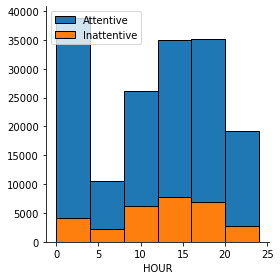

In [35]:
df['INATTENTIONIND'] = df['INATTENTIONIND'].replace('Y', 1).replace(np.nan, 0)
bins = [0, 4, 8, 12, 16, 20, 24]
g = sns.FacetGrid(df, hue='INATTENTIONIND', height=4)
g.map(plt.hist, 'HOUR', bins=bins, ec="k")
plt.legend(['Attentive', 'Inattentive'])

The Locations with the highest incident numbers are listed below. 

In [50]:
df['LOCATION'].value_counts().to_frame().head(10)

,LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
6TH AVE AND JAMES ST,252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,239
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,238
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,231
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,212
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,212
